# CSE-221710308025-KASARLA SAHITH REDDY

# **TO IDENTIFY SHIPS IN A SATELLITE IMAGE**

## Dataset link:

https://drive.google.com/drive/folders/1Dmuu5-yIY0QC_wUjRsPZG5INs3J41A9G?usp=sharing

# **Importing necessary packages**

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing import image

In [ ]:
#Versions Of Packages
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("matplotlib",matplotlib.__version__)
print("tensorflow",tf.__version__)

numpy 1.18.5
pandas 1.0.5
matplotlib 3.2.2
tensorflow 2.2.0


In [ ]:
## checking contents in the main folder folder

os.listdir("/content/drive/My Drive/project/2869_61115_bundle_archive")


['shipsnet.json', 'scenes', 'shipsnet']

In [ ]:
## creating base directory,ships directory,ship images directory.

base_dir="/content/drive/My Drive/project/2869_61115_bundle_archive"
ships_dir=os.path.join(base_dir,'shipsnet')
ships_imgs=os.path.join(ships_dir,'shipsnet1')

## **Displaying sample Images**

In [ ]:
# going through 5 ship image names in shipsnet1

imgships=os.listdir(ships_imgs)
imgships[:5]

['1__20170830_181003_0f4e__-122.35157982161317_37.78327205920199.png',
 '1__20170903_181304_1041__-122.3359293751746_37.7580383438423.png',
 '1__20170830_181004_0f4e__-122.33472265432373_37.759680938376434.png',
 '1__20170905_181214_0f12__-122.32764083883828_37.736846543182324.png',
 '1__20170901_181520_0e14__-122.35466805228293_37.75722310404933.png']

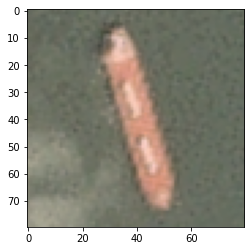

In [ ]:
#Displaying a sample image

plt.imshow(plt.imread(ships_imgs+'/1__20170830_181003_0f4e__-122.35157982161317_37.78327205920199.png'))

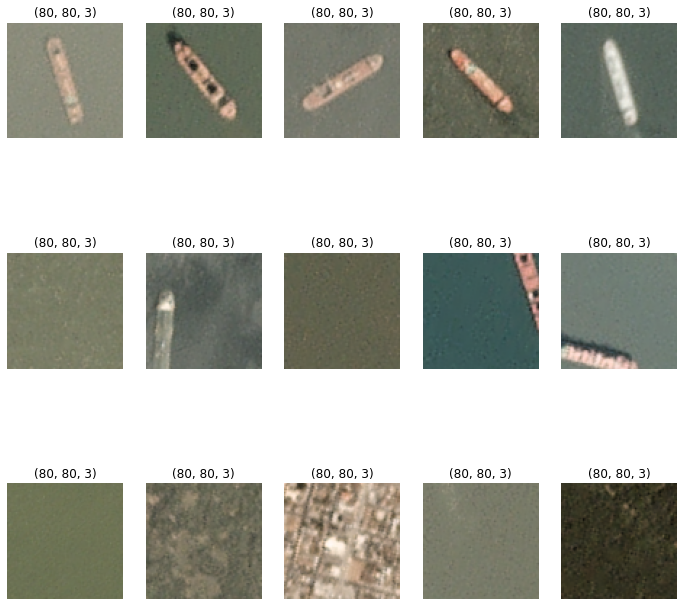

In [ ]:
#Visualisation of images

plt.figure(figsize=(12,12))
j=1
for i in range(1,3000,200):
  img=plt.imread(os.path.join(ships_imgs,imgships[i]))
  plt.subplot(3,5,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j+=1

# **Reading Data from .json file**

In [ ]:
## Opening of .json file

with open('/content/drive/My Drive/project/2869_61115_bundle_archive/shipsnet.json') as file:
  dataset=json.load(file)
file.close()

In [ ]:
# Creating DataFrame for data in .json file

all_ships=pd.DataFrame(dataset)
all_ships.head()

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


In [ ]:
# Dropping irrelevent columns
all_ships=all_ships.drop(['locations','scene_ids'],axis=1)
all_ships

,data,labels
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1
...,...,...
3995,"[126, 122, 124, 138, 165, 186, 195, 199, 203, ...",0
3996,"[130, 134, 139, 128, 117, 126, 141, 147, 142, ...",0
3997,"[171, 135, 118, 140, 145, 144, 154, 165, 139, ...",0
3998,"[85, 90, 94, 95, 94, 92, 93, 96, 93, 94, 94, 9...",0


In [ ]:
#Description of labels column
all_ships.describe()

,labels
count,4000.000000
mean,0.250000
std,0.433067
min,0.000000
25%,0.000000
50%,0.000000
75%,0.250000
max,1.000000


In [ ]:
# checking missing values in all_ships dataset column
all_ships.isnull().sum()

data      0
labels    0
dtype: int64

# **Checking for total number of ships images pesent in dataset**

In [ ]:
all_ships.labels.value_counts()

0    3000
1    1000
Name: labels, dtype: int64

### From the output we can conclude that there are total 4000 images and out of 4000 images there are 1000 ship containing images and 3000 non ship images

# **Extracting data and labels columns from dataset and converting it into numpy array format**

In [ ]:
items = np.array(dataset['data']).astype('int64') 
output_labels = np.array(dataset['labels']).astype('int64')

#checking datatypes of items and output_labels

print("items",type(items))
print("output_labels",type(output_labels))

items <class 'numpy.ndarray'>
output_labels <class 'numpy.ndarray'>


In [ ]:
# Checking shape of items

items.shape

(4000, 19200)

# Reshaping the items into 80 x 80 x 3 Format

In [ ]:
items=items.reshape([-1,3,80,80]).transpose([0,2,3,1])
items.shape

(4000, 80, 80, 3)

In [ ]:
# Checking shape of output_labels

output_labels.shape


(4000,)

## by observing the shapes of items,output_labels we can conclude that 
## items entries is in the format of 80 x 80 image size format for all the 4000 entries
## output_labels is consisting of single column of 4000 entries

# Scaling for items column

In [ ]:
items=items/ 255

# **Building the Model**

In [ ]:
model = Sequential() # Sequential model
#  adding Convolution Layer followed by Max pooling layer
model.add(Conv2D(16,3, padding='same', input_shape=(80,80,3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
#  adding Convolution Layer followed by Max pooling layer
model.add(Conv2D(32,3,padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
#  adding Convolution Layer followed by Max pooling layer
model.add(Conv2D(64,3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#  adding Convolution Layer followed by Max pooling layer
model.add(Conv2D(200,3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
# Converting feature map into 1-D array
model.add(Flatten())   
# Fully connected layes with 512 neurons                             
model.add(Dense(512, activation='relu'))       
# Final Output layer     
model.add(Dense(1, activation='sigmoid'))       
# Summary    
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 80, 80, 16)        448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 200)      

# **Compiling the model**

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# **Training the model**

In [ ]:
# Training the model where 20% of data is used for validaton and 80% pf data used for training

history=model.fit(items,output_labels,epochs=25,batch_size=32,validation_split=0.2)

Epoch 1/25
100/100 [==============================] - 2s 20ms/step - loss: 0.3170 - accuracy: 0.8666 - val_loss: 0.3829 - val_accuracy: 0.8138
Epoch 2/25
100/100 [==============================] - 2s 18ms/step - loss: 0.1494 - accuracy: 0.9362 - val_loss: 0.6701 - val_accuracy: 0.7000
Epoch 3/25
100/100 [==============================] - 2s 18ms/step - loss: 0.0979 - accuracy: 0.9641 - val_loss: 0.3768 - val_accuracy: 0.8250
Epoch 4/25
100/100 [==============================] - 2s 18ms/step - loss: 0.0577 - accuracy: 0.9834 - val_loss: 0.1879 - val_accuracy: 0.9262
Epoch 5/25
100/100 [==============================] - 2s 18ms/step - loss: 0.0589 - accuracy: 0.9784 - val_loss: 0.2348 - val_accuracy: 0.9175
Epoch 6/25
100/100 [==============================] - 2s 18ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.3019 - val_accuracy: 0.8950
Epoch 7/25
100/100 [==============================] - 2s 18ms/step - loss: 0.0216 - accuracy: 0.9922 - val_loss: 0.2135 - val_accuracy: 0.9150

# **Visualisation of accuacy and loss through graph**

### 1. Visualisation of graph between train accuracy and validation accuracy

### 2. Visualisation of graph between train loss and validation loss

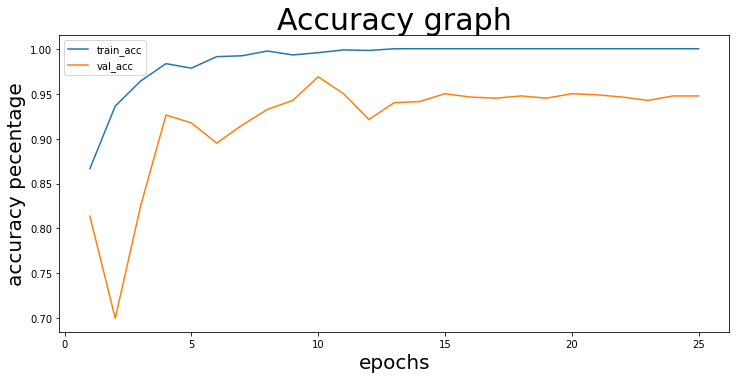

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Visualisation of graph between train accuracy and validation accuracy
plt.figure(figsize=(12,12))
epochs = list(range(1,26))
plt.plot(epochs,train_acc,label='train_acc',)
plt.plot(epochs,val_acc,label='val_acc')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("accuracy pecentage",fontsize=20)
plt.title('Accuracy graph',fontsize=30)
plt.legend()

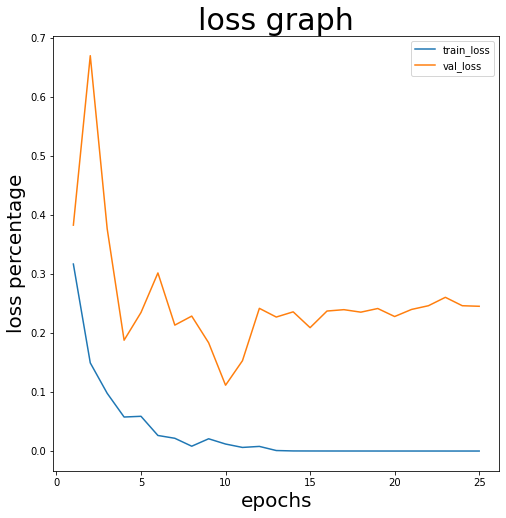

In [ ]:
# Visualisation of graph between train loss and validation loss
plt.figure(figsize=(8,8))
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("loss percentage",fontsize=20)
plt.title('loss graph',fontsize=30)
plt.legend()

### by observing from the above graph test accuracy and validation acuracy doesn't have much variation 
### so, the model doesn't overfit or underfit.  

# **Predicting unknown image or user's image**

## Predicting unknown ship image

In [ ]:
# Predicting unknown ship image
new_image = image.load_img('/content/drive/My Drive/project/1.png')
print(type(new_image))

new_image = tf.keras.preprocessing.image.img_to_array(new_image)
print("shape of image :",new_image.shape)
print("Type of image :",type(new_image))

# resizing
new_image = tf.image.resize(new_image,(80,80))

## Scaling 
new_image = new_image/255
print('After resizing the image shape :',new_image.shape)
new_image = np.expand_dims(new_image,axis=0)
print("image shape",new_image.shape)

<class 'PIL.PngImagePlugin.PngImageFile'>
shape of image : (101, 95, 3)
Type of image : <class 'numpy.ndarray'>
After resizing the image shape : (80, 80, 3)
image shape (1, 80, 80, 3)


In [ ]:
#Predicting
print('Output predicted',model.predict(new_image))
array_num = model.predict(new_image)
num_list = array_num.tolist()
x=num_list[0][0]
if x > 0.5:
  print('the given image contains SHIP')
else:
  print('the given image does NOT contains SHIP')

Output predicted [[1.]]
the given image contains SHIP


The value is 1 and it is above 0.5.
Hence,the image consists of image.

### predicting of unknown image where the image does not consists ship

In [ ]:
# predicting of unknown image where the image does not consists ship
new_image = image.load_img('/content/drive/My Drive/project/0.png')
print(type(new_image))

new_image = tf.keras.preprocessing.image.img_to_array(new_image)
print("shape of image :",new_image.shape)
print("Type of image :",type(new_image))

# resizing
new_image = tf.image.resize(new_image,(80,80))

## Scaling 
new_image = new_image/255
print('After resizing the image shape :',new_image.shape)
new_image = np.expand_dims(new_image,axis=0)
print("image shape",new_image.shape)


<class 'PIL.PngImagePlugin.PngImageFile'>
shape of image : (76, 78, 3)
Type of image : <class 'numpy.ndarray'>
After resizing the image shape : (80, 80, 3)
image shape (1, 80, 80, 3)


In [ ]:
#Predicting
print('Output predicted',model.predict(new_image))
array_num = model.predict(new_image)
num_list = array_num.tolist()
x=num_list[0][0]
if x > 0.5:
  print('the given image contains SHIP')
else:
  print('the given image does NOT contains SHIP')

Output predicted [[1.7355088e-10]]
the given image does NOT contains SHIP


The value is almost equivalent to 0 and it is less than 0.5.
Hence,there is no ship in the given image